In [21]:
!pip install astronn

In [22]:
from astroNN.datasets import load_galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion
import numpy as np
import matplotlib.pyplot as plt
import jax

# Galaxy 10 DECals

In [23]:
# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = load_galaxy10()

/root/.astroNN/datasets/Galaxy10_DECals.h5 was found!


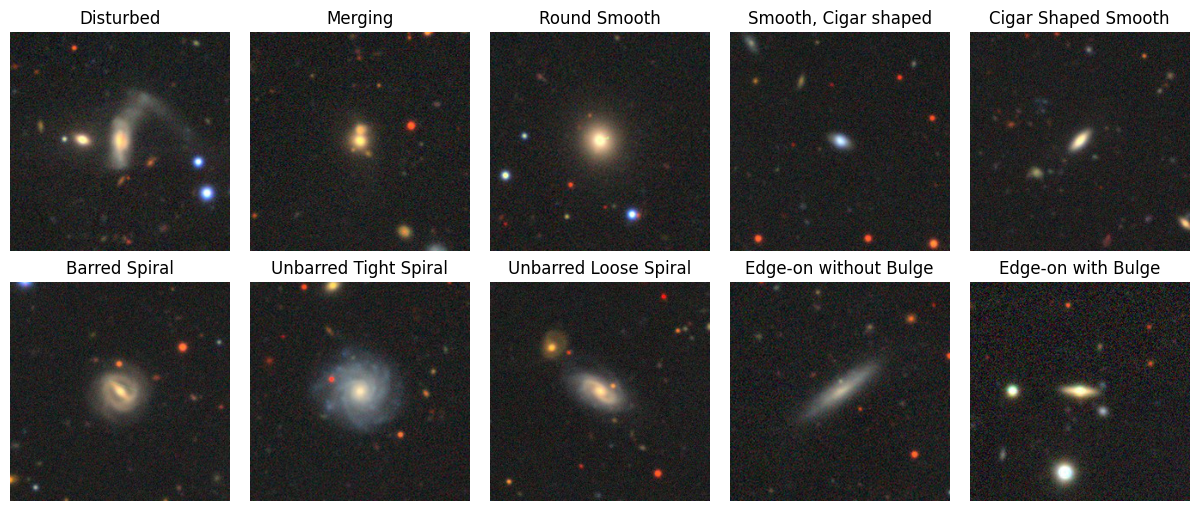

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(12,5), layout='constrained')

for ax, label in zip(np.ravel(axs), range(10)):
    idx = np.where(labels == label)[0][0]
    image = images[idx]

    ax.imshow(image)
    ax.axis('off')
    ax.set_title(galaxy10cls_lookup(label))

#### Remove classes that are not Spiral-like

In [25]:
remove_labels = range(5)

for label in remove_labels:
    idx = (labels != label)
    labels = labels[idx]
    images = images[idx]

#### Shift labels to 0-4

In [26]:
labels = labels - 5

galaxy10cls_lookup_shift = lambda x: galaxy10cls_lookup(x+5)

#### Rescale images

In [27]:
images.shape

(9796, 256, 256, 3)

In [28]:
images = jax.vmap(lambda x: jax.image.resize(x, (64,64,3), method='nearest'))(images)

#### Shuffle images

In [29]:
key = jax.random.PRNGKey(0)
rnd_idx = jax.random.choice(key, jax.numpy.arange(0, len(images), 1), replace=False, shape=[len(images)])
images = images[rnd_idx]
labels = labels[rnd_idx]

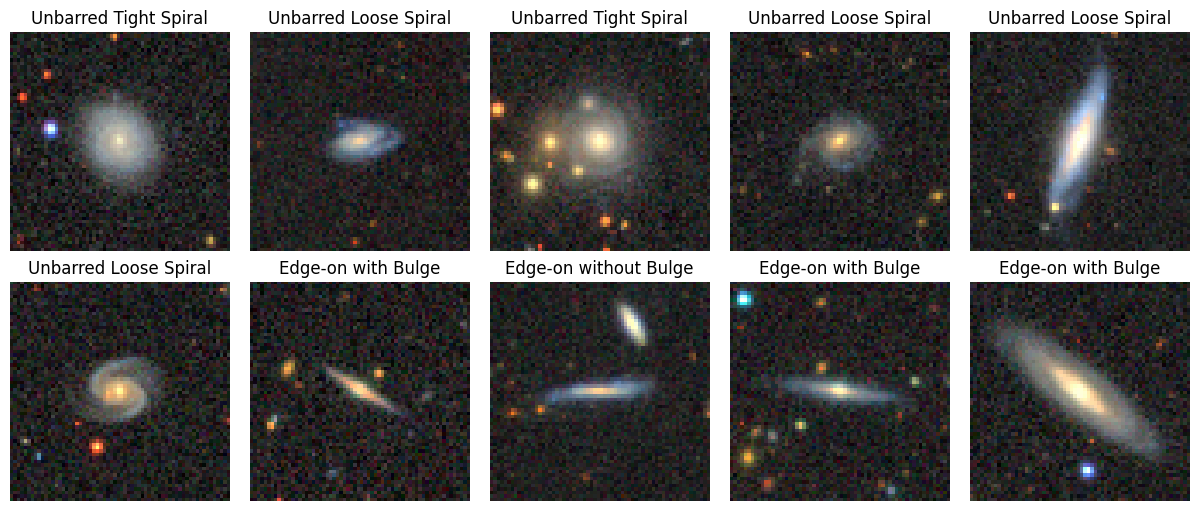

In [30]:
fig, axs = plt.subplots(2, 5, figsize=(12,5), layout='constrained')

for ax, idx in zip(np.ravel(axs), range(10)):
    image = images[idx]
    label = labels[idx]

    ax.imshow(image)
    ax.axis('off')
    ax.set_title(galaxy10cls_lookup_shift(label))

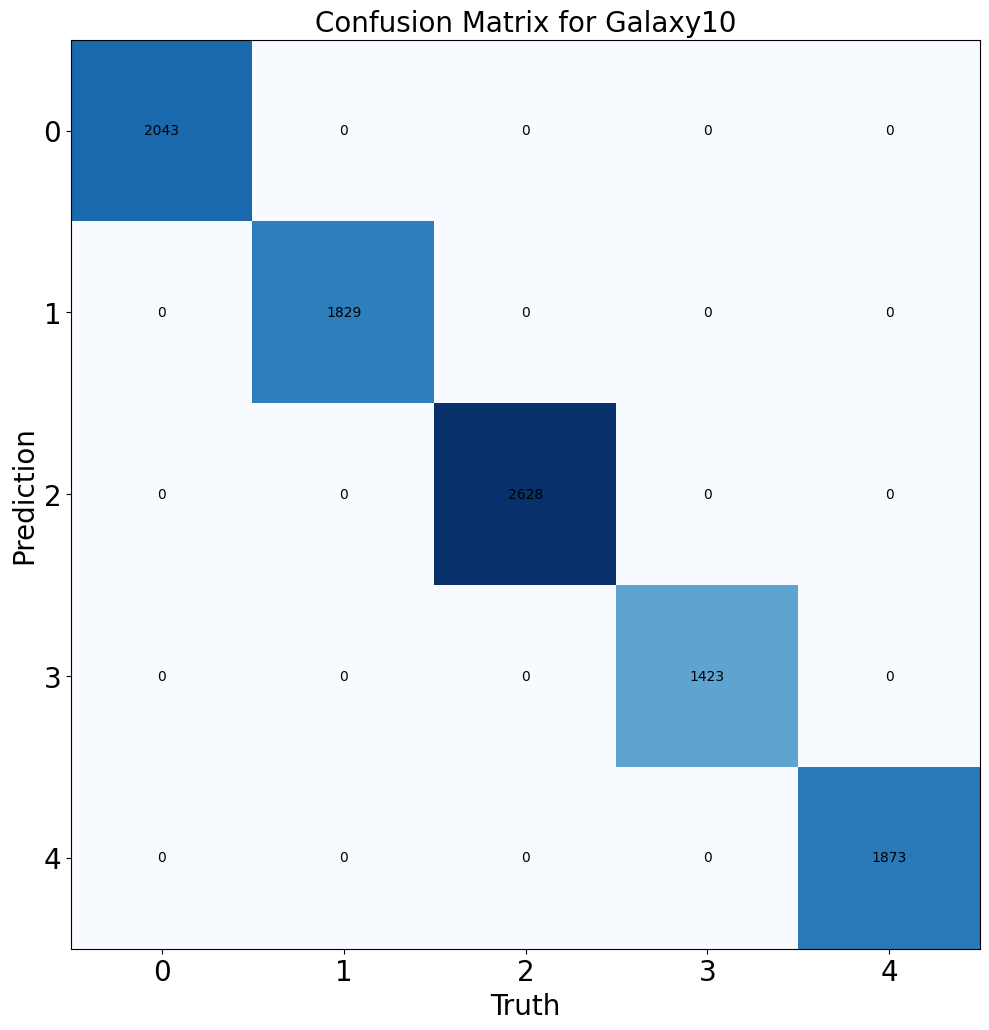

In [34]:
confusion_matrix = np.zeros((5,5))


# create the confusion matrix
for counter, i in enumerate(labels):
    confusion_matrix[i, labels[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)

# Task: Find the galaxy that looks most similar to Milky Way

<img src="https://www.nasa.gov/images/content/188404main_hurt_Milky_Way_2005-590_lg.jpg" width=300>

# 2nd Task: Genereate new images that look like the Milky Way